Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 3877135.22it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 333146.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2328419.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2542104.19it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.3367, Train Acc: 90.86%, Test Acc: 94.60%
Epoch [2/10], Loss: 0.1600, Train Acc: 95.36%, Test Acc: 95.95%
Epoch [3/10], Loss: 0.1175, Train Acc: 96.57%, Test Acc: 96.78%
Epoch [4/10], Loss: 0.0926, Train Acc: 97.25%, Test Acc: 97.07%
Epoch [5/10], Loss: 0.0774, Train Acc: 97.59%, Test Acc: 97.00%
Epoch [6/10], Loss: 0.0653, Train Acc: 98.02%, Test Acc: 97.31%
Epoch [7/10], Loss: 0.0556, Train Acc: 98.27%, Test Acc: 97.43%
Epoch [8/10], Loss: 0.0484, Train Acc: 98.57%, Test Acc: 97.52%
Epoch [9/10], Loss: 0.0426, Train Acc: 98.69%, Test Acc: 97.71%
Epoch [10/10], Loss: 0.0371, Train Acc: 98.81%, Test Acc: 97.50%


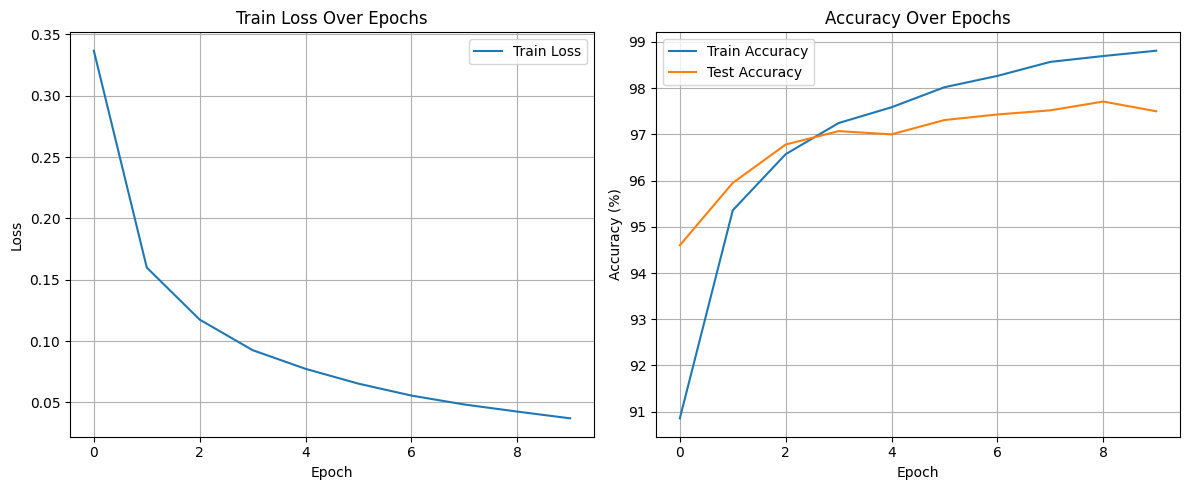

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Device 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 하이퍼파라미터
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# MNIST 데이터셋 불러오기
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 모델 정의
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()  # 활성화 함수 변경 가능
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # SGD 등으로 변경 가능

# 학습 과정 기록용
train_losses, train_accuracies, test_accuracies = [], [], []

# 학습 루프
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_loss += loss.item()

    train_accuracy = 100 * correct / total
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # 검증
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")

# 그래프 출력
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.title("Train Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 5

transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_sizes = [32, 64, 128, 256]
results = []

for batch_size in batch_sizes:
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x

    model = NeuralNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Test Accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append((batch_size, accuracy))
    print(f"Batch Size: {batch_size}, Test Accuracy: {accuracy:.2f}%")

# 최고 성능 배치 사이즈 출력
best_batch = max(results, key=lambda x: x[1])
print(f"\n✅ Best Batch Size: {best_batch[0]} with Accuracy: {best_batch[1]:.2f}%")


Batch Size: 32, Test Accuracy: 97.08%
Batch Size: 64, Test Accuracy: 96.80%
Batch Size: 128, Test Accuracy: 96.46%
Batch Size: 256, Test Accuracy: 95.65%

✅ Best Batch Size: 32 with Accuracy: 97.08%


Learning Rate: 0.1, Test Accuracy: 50.35%
Learning Rate: 0.01, Test Accuracy: 95.77%
Learning Rate: 0.001, Test Accuracy: 97.01%
Learning Rate: 0.0001, Test Accuracy: 93.24%


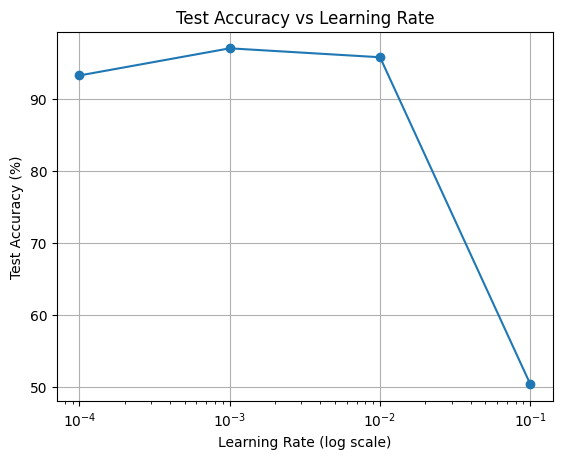


[분석 결과]
- 가장 높은 정확도는 learning rate 0.001 에서 97.01% 로 측정
- learning rate가 너무 크면 발산하거나 수렴 실패, 너무 작으면 학습이 느리거나 부족할 수 있음
- 따라서 적절한 learning rate (0.001) 선택이 중요


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 기본 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 5
batch_size = 32

# MNIST 데이터셋
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 실험할 Learning Rate 목록
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

# 모델 정의
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 실험 시작
for lr in learning_rates:
    model = NeuralNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 학습
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # 테스트 정확도 측정
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append((lr, accuracy))
    print(f"Learning Rate: {lr}, Test Accuracy: {accuracy:.2f}%")

# 결과 시각화
lrs, accs = zip(*results)
plt.plot(lrs, accs, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Learning Rate")
plt.grid(True)
plt.show()

# 분석 출력
best_lr, best_acc = max(results, key=lambda x: x[1])
print("\n[분석 결과]")
print(f"- 가장 높은 정확도는 learning rate {best_lr} 에서 {best_acc:.2f}% 로 측정")
print(f"- learning rate가 너무 크면 발산하거나 수렴 실패, 너무 작으면 학습이 느리거나 부족할 수 있음")
print(f"- 따라서 적절한 learning rate ({best_lr}) 선택이 중요")


Activation Function: ReLU, Test Accuracy: 97.14%
Activation Function: Sigmoid, Test Accuracy: 96.30%


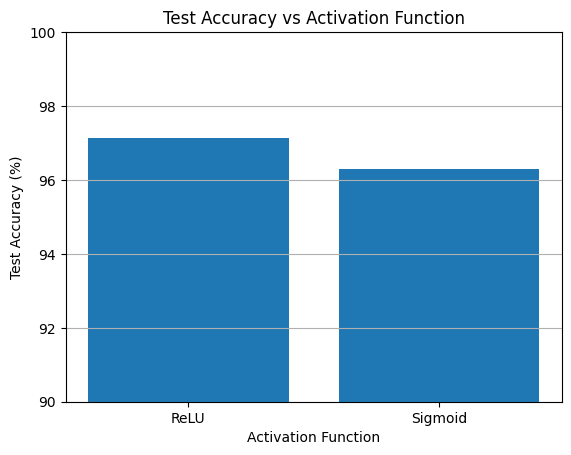


[분석 결과]
- 가장 높은 정확도는 ReLU에서 97.14%
- ReLU는 비선형성이 강하고 vanishing gradient 문제에 강해 딥러닝에서 일반적으로 더 성능이 좋음음.
- Sigmoid는 출력이 0~1 사이로 제한되며 깊은 네트워크에서는 gradient 소실 문제가 발생할 수 있어 보통은 ReLU가 더 적합.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 공통 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

# 데이터셋 로딩
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 실험 대상 Activation 함수
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid()
}

results = []

for name, activation_fn in activations.items():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.activation = activation_fn
            self.fc2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            x = self.fc1(x)
            x = self.activation(x)
            x = self.fc2(x)
            return x

    model = NeuralNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # 테스트 정확도 측정
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append((name, accuracy))
    print(f"Activation Function: {name}, Test Accuracy: {accuracy:.2f}%")

# 결과 시각화
names, accs = zip(*results)
plt.bar(names, accs)
plt.xlabel("Activation Function")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Activation Function")
plt.ylim(90, 100)
plt.grid(True, axis='y')
plt.show()

# 분석 출력
best_act, best_acc = max(results, key=lambda x: x[1])
print("\n[분석 결과]")
print(f"- 가장 높은 정확도는 {best_act}에서 {best_acc:.2f}%")
print(f"- ReLU는 비선형성이 강하고 vanishing gradient 문제에 강해 딥러닝에서 일반적으로 더 성능이 좋음음.")
print(f"- Sigmoid는 출력이 0~1 사이로 제한되며 깊은 네트워크에서는 gradient 소실 문제가 발생할 수 있어 보통은 ReLU가 더 적합.")


Optimizer: SGD, Test Accuracy: 86.23%
Optimizer: SGD_Momentum, Test Accuracy: 92.87%
Optimizer: Adam, Test Accuracy: 97.18%


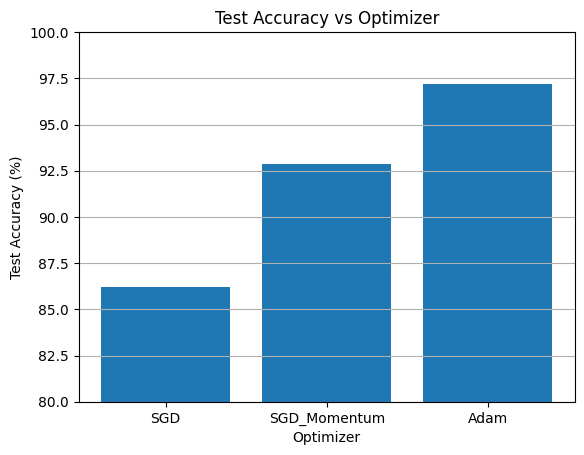


[분석 결과]
- 가장 높은 정확도는 Adam에서 97.18%
- 일반적으로 Adam은 adaptive learning rate 특성 덕분에 수렴 속도가 빠르고 안정적이며,
  SGD는 기본 형태만 사용할 경우 느리지만, Momentum을 추가하면 성능이 향상될 수 있음


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 공통 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

# 데이터셋 로딩
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 실험 대상 Optimizer
optimizer_configs = {
    "SGD": lambda params: optim.SGD(params, lr=learning_rate),
    "SGD_Momentum": lambda params: optim.SGD(params, lr=learning_rate, momentum=0.9),
    "Adam": lambda params: optim.Adam(params, lr=learning_rate)
}

results = []

for name, opt_fn in optimizer_configs.items():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x

    model = NeuralNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = opt_fn(model.parameters())

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # 테스트 정확도 측정
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append((name, accuracy))
    print(f"Optimizer: {name}, Test Accuracy: {accuracy:.2f}%")

# 결과 시각화
names, accs = zip(*results)
plt.bar(names, accs)
plt.xlabel("Optimizer")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Optimizer")
plt.ylim(80, 100)
plt.grid(True, axis='y')
plt.show()

# 분석 출력
best_opt, best_acc = max(results, key=lambda x: x[1])
print("\n[분석 결과]")
print(f"- 가장 높은 정확도는 {best_opt}에서 {best_acc:.2f}%")
print(f"- 일반적으로 Adam은 adaptive learning rate 특성 덕분에 수렴 속도가 빠르고 안정적이며,")
print(f"  SGD는 기본 형태만 사용할 경우 느리지만, Momentum을 추가하면 성능이 향상될 수 있음")


Loss Function: CrossEntropyLoss, Test Accuracy: 97.13%
Loss Function: NLLLoss + LogSoftmax, Test Accuracy: 96.82%


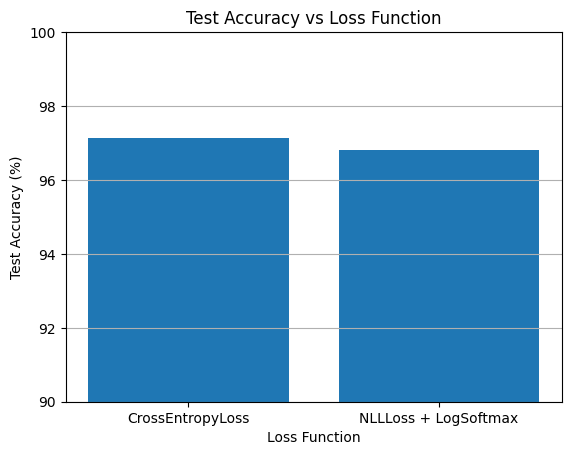


[분석 결과]
- 가장 높은 정확도는 CrossEntropyLoss에서 97.13%
- CrossEntropyLoss는 softmax와 negative log likelihood가 결합된 형태로, 대부분의 분류 문제에 기본 사용됨
- NLLLoss는 log-softmax와 함께 사용할 때 의미가 있으며, 구조상은 더 유연하지만 수작업이 필요


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 공통 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 64
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

# 데이터셋 로딩
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 실험 대상 Loss 설정
loss_configs = {
    "CrossEntropyLoss": {
        "loss_fn": nn.CrossEntropyLoss(),
        "output_fn": nn.Identity()  # CrossEntropy는 내부적으로 Softmax 포함
    },
    "NLLLoss + LogSoftmax": {
        "loss_fn": nn.NLLLoss(),
        "output_fn": nn.LogSoftmax(dim=1)
    }
}

results = []

for name, config in loss_configs.items():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, num_classes)
            self.output_fn = config["output_fn"]

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return self.output_fn(x)

    model = NeuralNet().to(device)
    criterion = config["loss_fn"]
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # 테스트 정확도 측정
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append((name, accuracy))
    print(f"Loss Function: {name}, Test Accuracy: {accuracy:.2f}%")

# 결과 시각화
names, accs = zip(*results)
plt.bar(names, accs)
plt.xlabel("Loss Function")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Loss Function")
plt.ylim(90, 100)
plt.grid(True, axis='y')
plt.show()

# 분석 출력
best_loss, best_acc = max(results, key=lambda x: x[1])
print("\n[분석 결과]")
print(f"- 가장 높은 정확도는 {best_loss}에서 {best_acc:.2f}%")
print(f"- CrossEntropyLoss는 softmax와 negative log likelihood가 결합된 형태로, 대부분의 분류 문제에 기본 사용됨")
print(f"- NLLLoss는 log-softmax와 함께 사용할 때 의미가 있으며, 구조상은 더 유연하지만 수작업이 필요")
